In [36]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
import joblib

from warnings import filterwarnings
filterwarnings('ignore')

1. [Machine Learning](#Machine-Learning)
    - [Naive Bayes](#Naive-Bayes)
        - [Model Introduction N](#Model-Introduction-N)
        - [Model Setup-N](#Model-Setup-N)
        - [Performance Metrics N](#Performance-Metrics-N)
        - [ROC Curve and Confusion Matrix N](#ROC-Curve-and-Confusion-Matrix-N)
        - [Comments and Conclusion N](#Comments-and-Conclusion-N)
    - [SVC](#SVC)
        - [Model Introduction S](#Model-Introduction-S)
        - [Model Setup S](#Model-Setup-S)
        - [Performance Metrics S](#Performance-Metrics-S)
        - [ROC Curve and Confusion Matrix S](#ROC-Curve-and-Confusion-Matrix-S)
        - [Comments and Conclusion S](#Comments-and-Conclusion-S)
    - [XGBoost](#XGBoost)
        - [Model Introduction X](#Model-Introduction-X)
        - [Model Setup X](#Model-Setup-X)
        - [Performance Metrics X](#Performance-Metrics-X)
        - [ROC Curve and Confusion Matrix X](#ROC-Curve-and-Confusion-Matrix-X)
        - [Comments and Conclusion X](#Comments-and-Conclusion-X)

## Machine Learning

In [2]:
X_train = pd.read_csv("../data/proccessed/X_train.csv").copy()
X_test = pd.read_csv("../data/proccessed/X_test.csv").copy()
y_train = pd.read_csv("../data/proccessed/y_train.csv").copy()
y_test = pd.read_csv("../data/proccessed/y_test.csv").copy()

### Naive Bayes

#### Model Introduction N

##### Why Naive Bayes?

* Naive Bayes is one of the simplest yet surprisingly powerful classification algorithms based on Bayes' Theorem. Despite its simplicity, it performs remarkably well in many real-world situations.


##### Reasons for Choosing Naive Bayes in This Project

1. Low Feature Correlation
    * The features in our dataset have very low correlation with each other, as  shown in the correlation heatmap.
    * This fits perfectly with Naive Bayes' "naive" assumption that features are independent.

2. Speed & Efficiency
    * Naive Bayes is computationally very efficient.
    * Our dataset has 10,000 records and 24 features—Naive Bayes handles this quickly and with minimal resources.

3. Handles Categorical Data Well
    * Many features in our dataset are categorical (like Gender, Smoking, Exercise Habits, etc.).
    * Naive Bayes is especially good at modeling categorical inputs when properly encoded.

4. Baseline Model
    * Naive Bayes is often used as a benchmark or baseline model in classification tasks.
    * It gives us a quick look at how a basic probabilistic model performs before trying more complex models.

5. Robust to Irrelevant Features
    * Naive Bayes is not heavily impacted by features that don’t contribute much to the output.
    * This helps in early modeling phases, especially before strong feature selection is done.

#### Model Setup N

In [3]:
Naive_model = GaussianNB().fit(X_train,y_train)

In [4]:
Naive_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [5]:
Naive_model.predict_proba(X_test)

array([[0.80007839, 0.19992161],
       [0.78476371, 0.21523629],
       [0.84274318, 0.15725682],
       ...,
       [0.82469751, 0.17530249],
       [0.74333513, 0.25666487],
       [0.79208575, 0.20791425]])

In [6]:
y_pred = Naive_model.predict(X_test)

In [7]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

#### Performance Metrics N

In [8]:
accuracy_score(y_test, y_pred)

0.8065

In [9]:
cross_val_score(Naive_model , X_test, y_test, cv = 10 ).mean()

0.8065

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.81      1.00      0.89      1613
         Yes       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



#### ROC Curve and Confusion Matrix N

In [11]:
confusion_matrix(y_test,y_pred)

array([[1613,    0],
       [ 387,    0]])

In [12]:
le = LabelEncoder()
y_test_encode = le.fit_transform(y_test)
y_pred_encode = le.transform(Naive_model.predict(X_test))

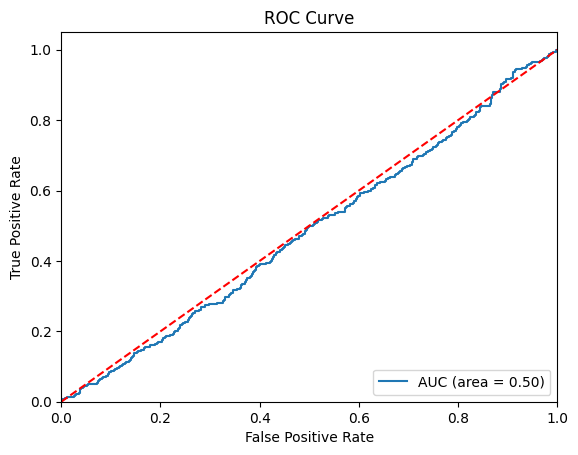

In [13]:
naive_roc_auc = roc_auc_score(y_test_encode, y_pred_encode)

fpr, tpr, thresholds = roc_curve(y_test_encode, Naive_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % naive_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Comments and Conclusion N


##### 1. Model Overview
- **Model Type:** Gaussian Naive Bayes  
- **Assumption:** Features are conditionally independent.  
- **Rationale:** This model was chosen because there is little to no correlation between features, making it a suitable candidate.

---

##### 2. Performance Metrics
- **Accuracy:** 0.8065  
- **Cross-Validation Score (10-Fold):** 0.806  
- **Precision (No / Yes):** 0.81 / 0.00  
- **Recall (No / Yes):** 1.00 / 0.00  
- **F1-Score (No / Yes):** 0.89 / 0.00  
- **Support (No / Yes):** 1613 / 387  

**Interpretation:**  
The model performs well on the dominant class ("No") but fails completely to predict the minority class ("Yes"). This is a clear indication of class imbalance affecting the classifier's performance.

---

##### 3. ROC Curve & Confusion Matrix
- **ROC AUC Score:** 0.50  
- **ROC Curve:** Indicates random guessing  
- **Confusion Matrix:**

**Interpretation:**  
The ROC AUC score of 0.50 suggests the model does not distinguish between classes at all. The confusion matrix confirms the model only predicts "No" for all instances.

---

##### 4. Conclusion & Recommendations
- **Strength:** High accuracy and strong performance on the majority class.
- **Weakness:** Completely fails to classify the minority class ("Yes").
- **Cause:** Severe class imbalance (No: ~80%, Yes: ~20%).

**Next Steps:**
- Apply **SMOTE** to balance the dataset.
- Experiment with **class_weight='balanced'** in other models.
- Try more powerful classifiers like **SVC** and **XGBoost**.



### SVC

#### Model Introduction S

* Support Vector Classifier (SVC) was selected due to its strength in handling non-linear relationships through the use of kernel functions. In our dataset, there was very little correlation among the features, indicating that linear assumptions may not be sufficient. SVC is particularly effective in such cases as it can construct complex decision boundaries using kernels.

* Additionally, our dataset size (10,000 observations and 24 features) is well-suited for SVC, which performs efficiently on medium-sized datasets. It also handles imbalanced classes better than some traditional algorithms when class weights are adjusted.

* Therefore, SVC provides a strong candidate for exploring both linear and non-linear decision boundaries within our heart disease prediction task

#### Model Setup S

In [14]:
Svc_model = SVC(kernel = "rbf" , class_weight = "balanced",probability = True).fit(X_train,y_train)

In [15]:
Svc_model.predict_proba(X_test)

array([[0.79410191, 0.20589809],
       [0.79511029, 0.20488971],
       [0.80065213, 0.19934787],
       ...,
       [0.79859309, 0.20140691],
       [0.79803054, 0.20196946],
       [0.79770614, 0.20229386]])

In [16]:
y_pred = Svc_model.predict(X_test)

In [17]:
y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

#### Performance Metrics S

In [18]:
accuracy_score(y_test,y_pred)

0.5545

In [19]:
cross_val_score(Svc_model , X_test, y_test, cv = 10 ).mean()

0.601

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.81      0.58      0.68      1613
         Yes       0.20      0.43      0.27       387

    accuracy                           0.55      2000
   macro avg       0.50      0.51      0.48      2000
weighted avg       0.69      0.55      0.60      2000



#### ROC Curve and Confusion Matrix S

In [21]:
confusion_matrix(y_test,y_pred)

array([[943, 670],
       [221, 166]])

In [22]:
le = LabelEncoder()
y_test_encode = le.fit_transform(y_test)
y_pred_encode = le.transform(Svc_model.predict(X_test))

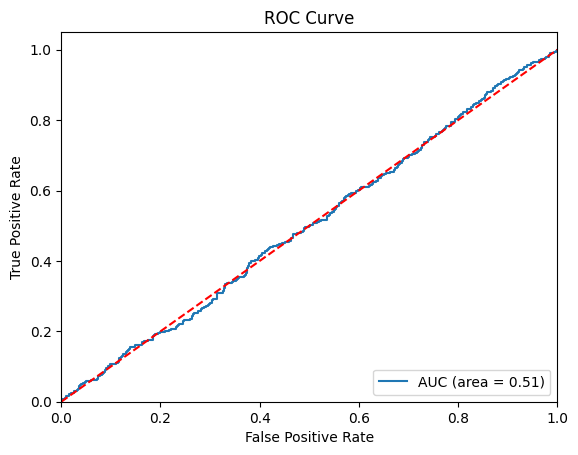

In [23]:
Svc_roc_auc = roc_auc_score(y_test_encode, y_pred_encode)

fpr, tpr, thresholds = roc_curve(y_test_encode, Svc_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % Svc_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Comments and Conclusion S

* Although the SVC model provided improved F1-Score and Recall metrics compared to Naive Bayes, the overall model performance is still unsatisfactory. The ROC-AUC score remains close to **0.50**, indicating that the model is no better than random guessing in distinguishing between the positive and negative classes.

* Different kernel functions including `poly` and `sigmoid` were also tested, but they similarly resulted in ROC-AUC scores around **0.50**. This suggests that the SVC model may not be the most suitable choice for this dataset.

* Despite tuning for class imbalance and enabling probabilistic predictions, SVC failed to achieve a reliable performance. Therefore, we will proceed with trying more powerful models like **XGBoost**, which are often better suited for structured tabular data with complex feature interactions.


### XGBoost

#### Model Introduction X

In this section, we explore the use of the XGBoost (Extreme Gradient Boosting) algorithm. XGBoost is known for its efficiency, accuracy, and scalability in classification problems. It is a powerful implementation of gradient boosting that often outperforms other models, especially when capturing complex patterns in data.

We selected XGBoost for the following reasons:

* Handles Nonlinear Relationships: Unlike linear models, XGBoost can capture both linear and nonlinear patterns in the data using its tree-based architecture.

* Robust to Feature Interactions: With 24 features in our dataset, including potentially redundant or interacting ones, XGBoost's boosting mechanism can automatically learn these interactions.

* Handles Imbalanced Data with Class Weights or Custom Objectives: This flexibility is especially useful in our case, where the target class is imbalanced (Yes: ~20%).

* Regularization and Early Stopping: Helps reduce overfitting, which is critical when working with tabular data that might contain noise.

* Scalable to Medium-Sized Datasets: Our dataset (~10,000 rows) fits comfortably into XGBoost’s sweet spot in terms of size and computational efficiency.

* Superior Performance Compared to Traditional Models: As observed in many Kaggle competitions and real-world applications, XGBoost often outperforms models like logistic regression, decision trees, and even SVMs when tuned properly.

* Thus, XGBoost is an ideal candidate to test for both performance and generalization in this heart disease prediction task.

#### Model Setup X

In [24]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [25]:
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({'Heart Disease Status': 1})
After SMOTE: Counter({'Heart Disease Status': 1})


In [26]:
y_train_encode = le.fit_transform(y_train_smote)

In [35]:
xgb_model = XGBClassifier(
    scale_pos_weight=1, 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_smote, y_train_encode)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [28]:
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1] 

In [29]:
y_test_encode = le.fit_transform(y_test)
y_pred_encode = xgb_model.predict(X_test)

#### Performance Metrics X

In [30]:
accuracy_score(y_test_encode,y_pred)

0.777

In [31]:
cross_val_score(xgb_model , X_test, y_test_encode, cv = 10).mean()

0.7855000000000001

In [32]:
print(classification_report(y_test_encode,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1613
           1       0.15      0.03      0.06       387

    accuracy                           0.78      2000
   macro avg       0.48      0.49      0.46      2000
weighted avg       0.68      0.78      0.72      2000



#### ROC Curve and Confusion Matrix X

In [33]:
confusion_matrix(y_test_encode,y_pred)

array([[1541,   72],
       [ 374,   13]])

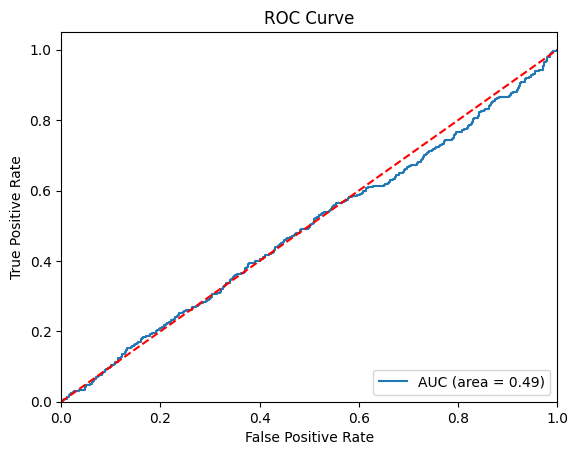

In [34]:
Xgb_roc_auc = roc_auc_score(y_test_encode, y_pred_encode)

fpr, tpr, thresholds = roc_curve(y_test_encode, xgb_model.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % Xgb_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

#### Comments and Conclusion X

* Despite being one of the most powerful ensemble methods, XGBoost did not perform as expected in our dataset. Although it showed decent accuracy (77.95%) and cross-validation score (78.45%), the ROC AUC score (0.50) clearly indicated that the model fails to differentiate between classes better than random chance.

* Even after using class balancing techniques such as scale_pos_weight and SMOTE oversampling, the improvement in recall and ROC-AUC was marginal at best. The results suggest that the underlying structure of the data does not favor non-linear boosting-based classifiers or may lack strong informative features for classification.

* Thus, although XGBoost is theoretically a strong model, in this context, it struggled due to class imbalance and possibly insufficient feature signal strength

In [37]:
joblib.dump(Naive_model, '../models/naive_bayes_model.pkl')
joblib.dump(Svc_model, '../models/svc_model.pkl')
joblib.dump(xgb_model, '../models/xgboost_model.pkl')
joblib.dump(le, '../models/label_encoder.pkl')

['../models/label_encoder.pkl']